# Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
%matplotlib inline
data = pd.read_csv('C:/Users/shrqfrhn/Downloads/data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
data.isnull().values.any()

False

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='ms')

In [6]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-18 06:13:46.200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-18 06:13:46.260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-18 06:13:46.320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-18 06:13:46.380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-18 06:13:46.440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# 1. NASDAQ.AAPL

In [7]:
df_AAPL = pd.DataFrame(data['NASDAQ.AAPL'])
df_AAPL.set_index(data['DATE'], inplace=True)
df_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41266 entries, 1970-01-18 06:13:46.200000 to 1970-01-18 09:50:09.600000
Data columns (total 1 columns):
NASDAQ.AAPL    41266 non-null float64
dtypes: float64(1)
memory usage: 644.8 KB


In [8]:
df_AAPL.head(5)

,NASDAQ.AAPL
DATE,
1970-01-18 06:13:46.200,143.6800
1970-01-18 06:13:46.260,143.7000
1970-01-18 06:13:46.320,143.6901
1970-01-18 06:13:46.380,143.6400
1970-01-18 06:13:46.440,143.6600


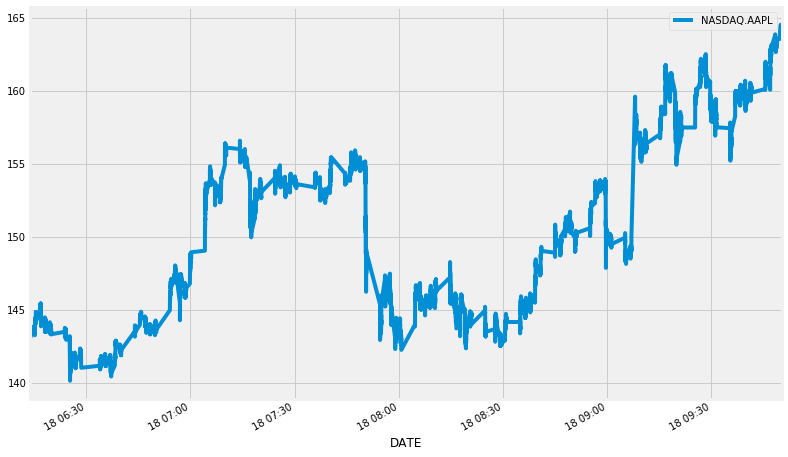

In [9]:
df_AAPL.plot(figsize=(12,8))

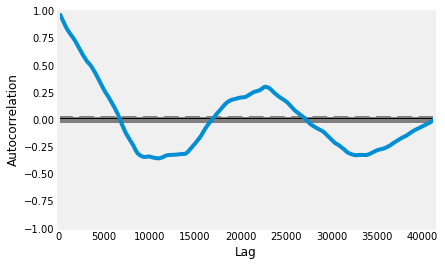

In [10]:
# Create an autocorrelation plot. 
autocorrelation_plot(df_AAPL)
plt.show()

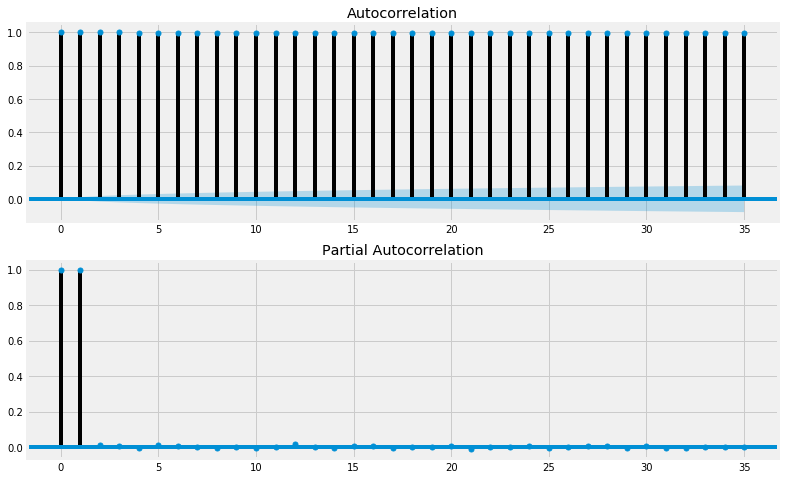

In [11]:
# Create ACF (Auto correlation) and PACF (partial Auto correlation) plots. 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_AAPL.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_AAPL, method='ywmle', lags=35, ax=ax2)

In [12]:
model = ARIMA(df_AAPL, order=(4,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                41265
Model:                 ARIMA(4, 1, 0)   Log Likelihood               39230.428
Method:                       css-mle   S.D. of innovations              0.094
Date:                Thu, 21 Feb 2019   AIC                         -78448.857
Time:                        01:30:49   BIC                         -78397.090
Sample:                             1   HQIC                        -78432.495
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.000      1.109      0.267      -0.000       0.001
ar.L1.D.NASDAQ.AAPL    -0.0102      0.005     -2.071      0.038      -0.020      -0.001
ar.L2.D.NASDAQ.A

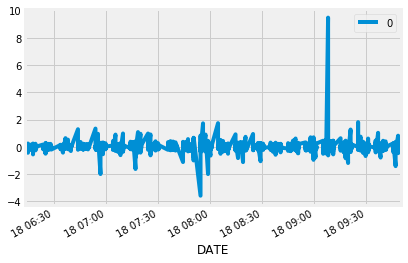

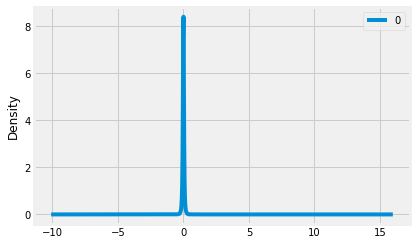

                  0
count  4.126500e+04
mean   1.451496e-08
std    9.351612e-02
min   -3.574222e+00
25%   -3.097373e-02
50%    8.304412e-05
75%    3.137102e-02
max    9.465095e+00


In [13]:
# Plot the residuals of the model. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [14]:
# Test the model with train and test data 
size=int(len(df_AAPL)*0.7)
train, test = df_AAPL.values[0:size], df_AAPL.values[size:len(df_AAPL)]
len(train), len(test)

(28886, 12380)

In [15]:
# Create train list and empty list to store the predictions 
X=list(train)
predictions=[]
for t in range (len(test)):
    model = ARIMA(X, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    X.append(test[t])
    print('%d. predicted=%f, expected=%f' % (len(predictions), yhat, test[t]))

1. predicted=150.612091, expected=150.620000
2. predicted=150.620385, expected=150.645100
3. predicted=150.645581, expected=150.650000
4. predicted=150.650085, expected=150.590100
5. predicted=150.590494, expected=150.620000
6. predicted=150.621150, expected=150.630000
7. predicted=150.628861, expected=150.550000
8. predicted=150.551425, expected=150.560000
9. predicted=150.561604, expected=150.589000
10. predicted=150.587954, expected=150.600000
11. predicted=150.600924, expected=150.609300
12. predicted=150.609452, expected=150.590000
13. predicted=150.589761, expected=150.575000
14. predicted=150.575625, expected=150.580000
15. predicted=150.580209, expected=150.600000
16. predicted=150.600230, expected=150.634500
17. predicted=150.634529, expected=150.637000
18. predicted=150.636637, expected=150.700000
19. predicted=150.700138, expected=150.750000
20. predicted=150.748294, expected=150.769000
21. predicted=150.768779, expected=150.775300
22. predicted=150.774712, expected=150.7800

178. predicted=151.141420, expected=151.160000
179. predicted=151.159977, expected=151.180000
180. predicted=151.180562, expected=151.182500
181. predicted=151.182551, expected=151.140000
182. predicted=151.140207, expected=151.180000
183. predicted=151.180822, expected=151.189900
184. predicted=151.188784, expected=151.160000
185. predicted=151.161196, expected=151.150000
186. predicted=151.150425, expected=151.160000
187. predicted=151.159980, expected=151.165400
188. predicted=151.165784, expected=151.167700
189. predicted=151.168106, expected=151.142500
190. predicted=151.142670, expected=151.114700
191. predicted=151.115499, expected=151.120000
192. predicted=151.120536, expected=151.098800
193. predicted=151.099066, expected=151.100000
194. predicted=151.101195, expected=151.076000
195. predicted=151.075968, expected=151.090000
196. predicted=151.091084, expected=151.070000
197. predicted=151.069717, expected=151.071000
198. predicted=151.072206, expected=151.120000
199. predicte

353. predicted=150.631455, expected=150.730000
354. predicted=150.727911, expected=150.670000
355. predicted=150.668736, expected=150.650000
356. predicted=150.651343, expected=150.709000
357. predicted=150.707498, expected=150.686800
358. predicted=150.686489, expected=150.670000
359. predicted=150.671650, expected=150.720000
360. predicted=150.719447, expected=150.610100
361. predicted=150.609493, expected=150.600000
362. predicted=150.603436, expected=150.580000
363. predicted=150.578592, expected=150.570000
364. predicted=150.572291, expected=150.589800
365. predicted=150.590204, expected=150.730000
366. predicted=150.729928, expected=150.700000
367. predicted=150.697536, expected=150.820000
368. predicted=150.821933, expected=150.766200
369. predicted=150.761380, expected=150.720000
370. predicted=150.723138, expected=150.683000
371. predicted=150.681878, expected=150.735500
372. predicted=150.736893, expected=150.789400
373. predicted=150.788806, expected=150.825000
374. predicte

528. predicted=150.852454, expected=150.860000
529. predicted=150.859123, expected=150.840000
530. predicted=150.840579, expected=150.915800
531. predicted=150.916210, expected=150.880000
532. predicted=150.878268, expected=150.860000
533. predicted=150.862106, expected=150.870000
534. predicted=150.869161, expected=150.850000
535. predicted=150.850401, expected=150.870000
536. predicted=150.871087, expected=150.879000
537. predicted=150.878454, expected=150.880000
538. predicted=150.880559, expected=150.875000
539. predicted=150.875011, expected=150.860000
540. predicted=150.860241, expected=150.870100
541. predicted=150.870611, expected=150.850000
542. predicted=150.849971, expected=150.803500
543. predicted=150.804553, expected=150.865300
544. predicted=150.866183, expected=150.860000
545. predicted=150.858746, expected=150.840000
546. predicted=150.841708, expected=150.850000
547. predicted=150.849676, expected=150.830000
548. predicted=150.829928, expected=150.859900
549. predicte

703. predicted=149.657617, expected=149.635000
704. predicted=149.636528, expected=149.720000
705. predicted=149.720455, expected=149.730000
706. predicted=149.728366, expected=149.700000
707. predicted=149.701088, expected=149.665000
708. predicted=149.664682, expected=149.605000
709. predicted=149.605570, expected=149.630000
710. predicted=149.631743, expected=149.635000
711. predicted=149.634635, expected=149.616500
712. predicted=149.617719, expected=149.665000
713. predicted=149.665315, expected=149.655000
714. predicted=149.653848, expected=149.730000
715. predicted=149.731179, expected=149.745000
716. predicted=149.742665, expected=149.745000
717. predicted=149.745683, expected=149.920000
718. predicted=149.919273, expected=149.960800
719. predicted=149.956787, expected=149.910000
720. predicted=149.910821, expected=149.840000
721. predicted=149.839051, expected=149.860000
722. predicted=149.860764, expected=149.840000
723. predicted=149.839897, expected=149.800000
724. predicte

878. predicted=150.248240, expected=150.245000
879. predicted=150.246543, expected=150.284800
880. predicted=150.284925, expected=150.260000
881. predicted=150.258646, expected=150.233800
882. predicted=150.235006, expected=150.260000
883. predicted=150.260015, expected=150.230000
884. predicted=150.229756, expected=150.215000
885. predicted=150.216536, expected=150.230000
886. predicted=150.229913, expected=150.225000
887. predicted=150.225206, expected=150.170000
888. predicted=150.170667, expected=150.100000
889. predicted=150.101163, expected=150.100000
890. predicted=150.101414, expected=150.120000
891. predicted=150.120456, expected=150.163500
892. predicted=150.164364, expected=150.170000
893. predicted=150.169409, expected=150.160000
894. predicted=150.160147, expected=150.100000
895. predicted=150.099804, expected=150.120000
896. predicted=150.121422, expected=150.090300
897. predicted=150.089669, expected=150.044900
898. predicted=150.046865, expected=150.060000
899. predicte

1052. predicted=150.166893, expected=150.060000
1053. predicted=150.064772, expected=150.120000
1054. predicted=150.119954, expected=150.227500
1055. predicted=150.226192, expected=150.120000
1056. predicted=150.119746, expected=150.180000
1057. predicted=150.182844, expected=150.150000
1058. predicted=150.146229, expected=150.085000
1059. predicted=150.088040, expected=150.210000
1060. predicted=150.210682, expected=150.160000
1061. predicted=150.157103, expected=150.205000
1062. predicted=150.208508, expected=150.210000
1063. predicted=150.206817, expected=150.200000
1064. predicted=150.201249, expected=150.300000
1065. predicted=150.299875, expected=150.310000
1066. predicted=150.307682, expected=150.260000
1067. predicted=150.260975, expected=150.420000
1068. predicted=150.420064, expected=150.495000
1069. predicted=150.490860, expected=150.400000
1070. predicted=150.400542, expected=150.490000
1071. predicted=150.490770, expected=150.559900
1072. predicted=150.556030, expected=150

1223. predicted=151.698057, expected=151.740000
1224. predicted=151.740849, expected=151.820000
1225. predicted=151.819299, expected=151.805600
1226. predicted=151.804965, expected=151.810000
1227. predicted=151.810705, expected=151.815000
1228. predicted=151.813828, expected=151.770100
1229. predicted=151.770490, expected=151.820000
1230. predicted=151.821373, expected=151.860000
1231. predicted=151.858607, expected=151.840000
1232. predicted=151.840433, expected=151.855200
1233. predicted=151.855576, expected=151.850000
1234. predicted=151.849117, expected=151.840000
1235. predicted=151.840842, expected=151.870000
1236. predicted=151.870260, expected=151.910000
1237. predicted=151.909563, expected=151.870000
1238. predicted=151.869711, expected=151.890200
1239. predicted=151.891369, expected=151.920000
1240. predicted=151.918835, expected=151.840000
1241. predicted=151.840307, expected=151.810000
1242. predicted=151.812169, expected=151.745200
1243. predicted=151.744988, expected=151

1394. predicted=151.984871, expected=151.978600
1395. predicted=151.978708, expected=151.975000
1396. predicted=151.975450, expected=152.000000
1397. predicted=152.000173, expected=152.040000
1398. predicted=152.039761, expected=152.024000
1399. predicted=152.023581, expected=151.970000
1400. predicted=151.970622, expected=152.050000
1401. predicted=152.050886, expected=152.105000
1402. predicted=152.103121, expected=152.120000
1403. predicted=152.120496, expected=152.150000
1404. predicted=152.149215, expected=152.150000
1405. predicted=152.148854, expected=152.209900
1406. predicted=152.210263, expected=152.220000
1407. predicted=152.218380, expected=152.220000
1408. predicted=152.220584, expected=152.220000
1409. predicted=152.219470, expected=152.210000
1410. predicted=152.210131, expected=152.220000
1411. predicted=152.220539, expected=152.240000
1412. predicted=152.239968, expected=152.230000
1413. predicted=152.230041, expected=152.280000
1414. predicted=152.280590, expected=152

1565. predicted=153.738354, expected=153.790000
1566. predicted=153.790221, expected=153.758300
1567. predicted=153.757294, expected=153.820000
1568. predicted=153.821277, expected=153.760000
1569. predicted=153.757782, expected=153.780000
1570. predicted=153.782822, expected=153.765800
1571. predicted=153.764182, expected=153.760000
1572. predicted=153.761770, expected=153.765000
1573. predicted=153.765052, expected=153.720100
1574. predicted=153.720459, expected=153.775000
1575. predicted=153.776583, expected=153.810000
1576. predicted=153.808573, expected=153.790000
1577. predicted=153.790661, expected=153.732700
1578. predicted=153.732957, expected=153.690000
1579. predicted=153.690977, expected=153.744100
1580. predicted=153.745299, expected=153.760000
1581. predicted=153.759550, expected=153.745000
1582. predicted=153.746077, expected=153.725000
1583. predicted=153.725002, expected=153.676500
1584. predicted=153.676915, expected=153.710000
1585. predicted=153.711578, expected=153

1736. predicted=152.900366, expected=152.940000
1737. predicted=152.943879, expected=152.915000
1738. predicted=152.912876, expected=152.950000
1739. predicted=152.953579, expected=152.950100
1740. predicted=152.948741, expected=153.000000
1741. predicted=153.001027, expected=153.051900
1742. predicted=153.050514, expected=153.011000
1743. predicted=153.010473, expected=152.990000
1744. predicted=152.990968, expected=153.005000
1745. predicted=153.004678, expected=153.003500
1746. predicted=153.003897, expected=152.980000
1747. predicted=152.980786, expected=153.030000
1748. predicted=153.030667, expected=153.020000
1749. predicted=153.018925, expected=152.980100
1750. predicted=152.981423, expected=152.955000
1751. predicted=152.955404, expected=152.940000
1752. predicted=152.940713, expected=152.955000
1753. predicted=152.956075, expected=152.918400
1754. predicted=152.918582, expected=152.920000
1755. predicted=152.921551, expected=152.925000
1756. predicted=152.924728, expected=152

1907. predicted=153.391724, expected=153.340000
1908. predicted=153.337644, expected=153.330000
1909. predicted=153.332813, expected=153.180000
1910. predicted=153.179115, expected=153.240000
1911. predicted=153.244576, expected=153.280000
1912. predicted=153.277725, expected=153.299600
1913. predicted=153.301926, expected=153.210000
1914. predicted=153.209243, expected=153.186600
1915. predicted=153.188558, expected=153.250000
1916. predicted=153.249768, expected=153.190000
1917. predicted=153.190028, expected=153.265200
1918. predicted=153.267889, expected=153.330000
1919. predicted=153.327014, expected=153.340000
1920. predicted=153.340437, expected=153.420000
1921. predicted=153.419494, expected=153.510000
1922. predicted=153.507532, expected=153.480000
1923. predicted=153.478774, expected=153.480000
1924. predicted=153.480575, expected=153.500000
1925. predicted=153.498626, expected=153.560000
1926. predicted=153.560353, expected=153.540000
1927. predicted=153.539097, expected=153

2078. predicted=153.509583, expected=153.510000
2079. predicted=153.511230, expected=153.543500
2080. predicted=153.543645, expected=153.570000
2081. predicted=153.570023, expected=153.570000
2082. predicted=153.570007, expected=153.565000
2083. predicted=153.565034, expected=153.550000
2084. predicted=153.550019, expected=153.520000
2085. predicted=153.520627, expected=153.555000
2086. predicted=153.555992, expected=153.530000
2087. predicted=153.529459, expected=153.480000
2088. predicted=153.481698, expected=153.501800
2089. predicted=153.502530, expected=153.490000
2090. predicted=153.489751, expected=153.490100
2091. predicted=153.491701, expected=153.390000
2092. predicted=153.389836, expected=153.440000
2093. predicted=153.442894, expected=153.420000
2094. predicted=153.418226, expected=153.429900
2095. predicted=153.432746, expected=153.570000
2096. predicted=153.569152, expected=153.520000
2097. predicted=153.517412, expected=153.482200
2098. predicted=153.484819, expected=153

2249. predicted=153.351491, expected=153.383100
2250. predicted=153.379075, expected=153.380000
2251. predicted=153.379042, expected=153.354200
2252. predicted=153.354467, expected=153.370000
2253. predicted=153.370417, expected=153.375000
2254. predicted=153.374727, expected=153.360000
2255. predicted=153.360746, expected=153.460000
2256. predicted=153.460500, expected=153.350000
2257. predicted=153.347653, expected=153.425000
2258. predicted=153.429217, expected=153.490000
2259. predicted=153.485873, expected=153.512800
2260. predicted=153.513948, expected=153.440000
2261. predicted=153.439270, expected=153.530000
2262. predicted=153.531339, expected=153.570000
2263. predicted=153.567055, expected=153.580000
2264. predicted=153.581337, expected=153.590000
2265. predicted=153.589115, expected=153.470000
2266. predicted=153.469581, expected=153.520700
2267. predicted=153.523905, expected=153.580000
2268. predicted=153.577743, expected=153.552000
2269. predicted=153.553197, expected=153

2420. predicted=152.099935, expected=152.041000
2421. predicted=152.046674, expected=151.770000
2422. predicted=151.768469, expected=151.450000
2423. predicted=151.458531, expected=151.380000
2424. predicted=151.385740, expected=150.855000
2425. predicted=150.856377, expected=150.730000
2426. predicted=150.745909, expected=150.380800
2427. predicted=150.377699, expected=150.540000
2428. predicted=150.554005, expected=150.800000
2429. predicted=150.794868, expected=151.130000
2430. predicted=151.132068, expected=151.100000
2431. predicted=151.093298, expected=151.050000
2432. predicted=151.050558, expected=150.950000
2433. predicted=150.945907, expected=151.020000
2434. predicted=151.022542, expected=150.620000
2435. predicted=150.617537, expected=150.668400
2436. predicted=150.679826, expected=150.670000
2437. predicted=150.663827, expected=150.920000
2438. predicted=150.927001, expected=150.850000
2439. predicted=150.843900, expected=150.830000
2440. predicted=150.834273, expected=150

2591. predicted=150.032206, expected=150.010000
2592. predicted=150.010262, expected=150.120000
2593. predicted=150.120363, expected=150.130000
2594. predicted=150.127672, expected=150.089900
2595. predicted=150.091211, expected=150.160000
2596. predicted=150.159093, expected=150.280000
2597. predicted=150.278580, expected=150.220000
2598. predicted=150.219294, expected=150.240000
2599. predicted=150.241112, expected=150.260000
2600. predicted=150.257120, expected=150.350000
2601. predicted=150.351276, expected=150.355500
2602. predicted=150.353890, expected=150.270000
2603. predicted=150.270414, expected=150.260100
2604. predicted=150.260251, expected=150.350000
2605. predicted=150.349675, expected=150.560000
2606. predicted=150.560405, expected=149.790000
2607. predicted=149.786631, expected=149.720000
2608. predicted=149.734808, expected=149.690000
2609. predicted=149.680923, expected=149.480000
2610. predicted=149.493955, expected=149.459200
2611. predicted=149.464242, expected=149

2762. predicted=149.851198, expected=149.875000
2763. predicted=149.871947, expected=149.930000
2764. predicted=149.931181, expected=149.940000
2765. predicted=149.938839, expected=149.957800
2766. predicted=149.957867, expected=150.000000
2767. predicted=149.998970, expected=150.030000
2768. predicted=150.029413, expected=150.059900
2769. predicted=150.059623, expected=150.010000
2770. predicted=150.009077, expected=150.060000
2771. predicted=150.060911, expected=149.970000
2772. predicted=149.968159, expected=149.990000
2773. predicted=149.993315, expected=150.001100
2774. predicted=149.999177, expected=150.059900
2775. predicted=150.061818, expected=150.055000
2776. predicted=150.053820, expected=150.010000
2777. predicted=150.010586, expected=149.940000
2778. predicted=149.939843, expected=149.910000
2779. predicted=149.911177, expected=149.880000
2780. predicted=149.880943, expected=149.900000
2781. predicted=149.901825, expected=149.960000
2782. predicted=149.960173, expected=149

2933. predicted=149.817874, expected=149.844400
2934. predicted=149.844506, expected=149.870000
2935. predicted=149.869383, expected=149.860000
2936. predicted=149.860596, expected=149.840000
2937. predicted=149.840079, expected=149.839500
2938. predicted=149.839503, expected=149.820000
2939. predicted=149.820197, expected=149.830000
2940. predicted=149.830947, expected=149.844800
2941. predicted=149.844653, expected=149.825000
2942. predicted=149.825361, expected=149.833300
2943. predicted=149.833827, expected=149.820000
2944. predicted=149.819571, expected=149.831000
2945. predicted=149.831907, expected=149.830000
2946. predicted=149.829712, expected=149.810000
2947. predicted=149.810551, expected=149.850000
2948. predicted=149.850393, expected=149.800000
2949. predicted=149.799238, expected=149.774500
2950. predicted=149.776363, expected=149.770000
2951. predicted=149.769464, expected=149.750000
2952. predicted=149.750972, expected=149.560000
2953. predicted=149.560847, expected=149

3104. predicted=148.659617, expected=148.690000
3105. predicted=148.689505, expected=148.650000
3106. predicted=148.649359, expected=148.584100
3107. predicted=148.584959, expected=148.575500
3108. predicted=148.576062, expected=148.590000
3109. predicted=148.590646, expected=148.620000
3110. predicted=148.621165, expected=148.590000
3111. predicted=148.589777, expected=148.660000
3112. predicted=148.660844, expected=148.720000
3113. predicted=148.718059, expected=148.700000
3114. predicted=148.700047, expected=148.610000
3115. predicted=148.609454, expected=148.685000
3116. predicted=148.685782, expected=148.700000
3117. predicted=148.698391, expected=148.715900
3118. predicted=148.718139, expected=148.790000
3119. predicted=148.788628, expected=148.840000
3120. predicted=148.838606, expected=148.853200
3121. predicted=148.852645, expected=148.870000
3122. predicted=148.868859, expected=148.914500
3123. predicted=148.913538, expected=148.860000
3124. predicted=148.859033, expected=148

3275. predicted=148.244357, expected=148.197000
3276. predicted=148.198632, expected=148.205000
3277. predicted=148.204983, expected=148.150000
3278. predicted=148.151394, expected=148.194800
3279. predicted=148.197148, expected=148.220000
3280. predicted=148.218703, expected=148.275000
3281. predicted=148.276188, expected=148.300000
3282. predicted=148.298396, expected=148.360000
3283. predicted=148.359693, expected=148.410000
3284. predicted=148.408147, expected=148.540000
3285. predicted=148.539386, expected=148.640000
3286. predicted=148.636965, expected=148.630000
3287. predicted=148.628165, expected=148.655000
3288. predicted=148.653625, expected=148.650000
3289. predicted=148.647589, expected=148.640000
3290. predicted=148.640633, expected=148.620000
3291. predicted=148.619783, expected=148.612100
3292. predicted=148.612662, expected=148.680000
3293. predicted=148.680499, expected=148.739900
3294. predicted=148.739160, expected=148.720000
3295. predicted=148.719610, expected=148

3446. predicted=148.848076, expected=148.820000
3447. predicted=148.821473, expected=148.800100
3448. predicted=148.799733, expected=148.824700
3449. predicted=148.825166, expected=148.905300
3450. predicted=148.905577, expected=148.925000
3451. predicted=148.924181, expected=148.960000
3452. predicted=148.959916, expected=148.975000
3453. predicted=148.972880, expected=148.960000
3454. predicted=148.959688, expected=149.010000
3455. predicted=149.009904, expected=149.050000
3456. predicted=149.048768, expected=149.020000
3457. predicted=149.020033, expected=148.980000
3458. predicted=148.979949, expected=148.985000
3459. predicted=148.984885, expected=149.110000
3460. predicted=149.110590, expected=149.070000
3461. predicted=149.068476, expected=149.105000
3462. predicted=149.106910, expected=149.170000
3463. predicted=149.166524, expected=149.090000
3464. predicted=149.089883, expected=149.070000
3465. predicted=149.071527, expected=149.090000
3466. predicted=149.088561, expected=149

3617. predicted=149.081060, expected=149.060000
3618. predicted=149.057985, expected=149.060000
3619. predicted=149.061352, expected=149.094700
3620. predicted=149.094188, expected=149.080000
3621. predicted=149.079899, expected=149.039900
3622. predicted=149.040591, expected=149.025000
3623. predicted=149.025094, expected=149.070000
3624. predicted=149.070538, expected=149.070000
3625. predicted=149.070005, expected=148.950000
3626. predicted=148.950679, expected=149.030000
3627. predicted=149.031757, expected=149.000000
3628. predicted=148.997528, expected=148.980000
3629. predicted=148.984006, expected=148.960000
3630. predicted=148.958570, expected=149.056000
3631. predicted=149.057202, expected=148.980000
3632. predicted=148.978378, expected=149.008700
3633. predicted=149.011664, expected=148.960000
3634. predicted=148.956829, expected=148.986400
3635. predicted=148.989471, expected=149.000000
3636. predicted=148.998637, expected=149.025400
3637. predicted=149.026591, expected=149

3788. predicted=159.426166, expected=159.520200
3789. predicted=159.521117, expected=159.300000
3790. predicted=159.293604, expected=158.925000
3791. predicted=158.934226, expected=158.439000
3792. predicted=158.443583, expected=158.810000
3793. predicted=158.816403, expected=158.798500
3794. predicted=158.797113, expected=158.459000
3795. predicted=158.472939, expected=158.820000
3796. predicted=158.816368, expected=158.810000
3797. predicted=158.802785, expected=158.740000
3798. predicted=158.750196, expected=158.620000
3799. predicted=158.615618, expected=158.745000
3800. predicted=158.746059, expected=158.448600
3801. predicted=158.449347, expected=158.350100
3802. predicted=158.358557, expected=158.390000
3803. predicted=158.386951, expected=158.400000
3804. predicted=158.404283, expected=158.390000
3805. predicted=158.392460, expected=158.340000
3806. predicted=158.340280, expected=158.010000
3807. predicted=158.012869, expected=157.931400
3808. predicted=157.936793, expected=157

3959. predicted=157.709478, expected=157.580000
3960. predicted=157.583037, expected=157.660000
3961. predicted=157.662219, expected=157.570000
3962. predicted=157.569478, expected=157.400000
3963. predicted=157.405696, expected=157.360000
3964. predicted=157.360833, expected=157.316800
3965. predicted=157.318449, expected=157.370000
3966. predicted=157.373604, expected=157.419000
3967. predicted=157.418846, expected=157.417000
3968. predicted=157.417975, expected=157.370000
3969. predicted=157.370095, expected=157.268000
3970. predicted=157.268729, expected=157.323500
3971. predicted=157.324698, expected=157.326500
3972. predicted=157.326277, expected=157.269900
3973. predicted=157.272941, expected=157.270000
3974. predicted=157.270185, expected=157.265500
3975. predicted=157.265476, expected=157.226200
3976. predicted=157.227979, expected=157.165000
3977. predicted=157.166285, expected=157.200000
3978. predicted=157.200856, expected=157.280000
3979. predicted=157.279763, expected=157

4130. predicted=157.787456, expected=157.760000
4131. predicted=157.759208, expected=157.760000
4132. predicted=157.761547, expected=157.850000
4133. predicted=157.850498, expected=157.835000
4134. predicted=157.834729, expected=157.930000
4135. predicted=157.930770, expected=157.970100
4136. predicted=157.967193, expected=157.940000
4137. predicted=157.941038, expected=157.894500
4138. predicted=157.894123, expected=158.020000
4139. predicted=158.019390, expected=158.060000
4140. predicted=158.058707, expected=158.060000
4141. predicted=158.061666, expected=158.000000
4142. predicted=157.998722, expected=158.015500
4143. predicted=158.015944, expected=157.990000
4144. predicted=157.989938, expected=157.985000
4145. predicted=157.987071, expected=157.940000
4146. predicted=157.940294, expected=157.810000
4147. predicted=157.812247, expected=157.720000
4148. predicted=157.722518, expected=157.740000
4149. predicted=157.741474, expected=157.699100
4150. predicted=157.701271, expected=157

4301. predicted=156.353101, expected=156.300000
4302. predicted=156.298319, expected=156.255000
4303. predicted=156.257249, expected=156.140000
4304. predicted=156.139831, expected=156.030000
4305. predicted=156.033291, expected=156.091800
4306. predicted=156.093278, expected=156.140000
4307. predicted=156.140627, expected=156.110000
4308. predicted=156.112433, expected=156.170000
4309. predicted=156.169579, expected=156.129000
4310. predicted=156.127740, expected=156.060000
4311. predicted=156.062369, expected=156.140000
4312. predicted=156.139369, expected=156.030000
4313. predicted=156.030321, expected=156.039300
4314. predicted=156.042952, expected=155.990000
4315. predicted=155.988303, expected=155.929000
4316. predicted=155.932570, expected=155.945600
4317. predicted=155.946159, expected=155.870000
4318. predicted=155.871148, expected=155.910000
4319. predicted=155.912386, expected=155.920000
4320. predicted=155.918933, expected=155.950000
4321. predicted=155.951756, expected=156

4472. predicted=155.680418, expected=155.690000
4473. predicted=155.690994, expected=155.686600
4474. predicted=155.685680, expected=155.673600
4475. predicted=155.675578, expected=155.660000
4476. predicted=155.660423, expected=155.680000
4477. predicted=155.680395, expected=155.630000
4478. predicted=155.630580, expected=155.580000
4479. predicted=155.581763, expected=155.580000
4480. predicted=155.580315, expected=155.600000
4481. predicted=155.600824, expected=155.595400
4482. predicted=155.596467, expected=155.564700
4483. predicted=155.565471, expected=155.519000
4484. predicted=155.519672, expected=155.570000
4485. predicted=155.570517, expected=155.600000
4486. predicted=155.599742, expected=155.630000
4487. predicted=155.630981, expected=155.650000
4488. predicted=155.649090, expected=155.575000
4489. predicted=155.575240, expected=155.603100
4490. predicted=155.603868, expected=155.609900
4491. predicted=155.608949, expected=155.620000
4492. predicted=155.621812, expected=155

4643. predicted=156.830053, expected=156.280000
4644. predicted=156.282203, expected=156.372400
4645. predicted=156.380028, expected=156.330000
4646. predicted=156.322999, expected=156.270000
4647. predicted=156.282575, expected=156.300000
4648. predicted=156.298882, expected=156.290000
4649. predicted=156.290377, expected=156.230000
4650. predicted=156.232327, expected=156.260000
4651. predicted=156.260330, expected=156.450000
4652. predicted=156.448359, expected=156.330000
4653. predicted=156.330061, expected=156.310000
4654. predicted=156.313124, expected=156.380000
4655. predicted=156.375576, expected=156.359800
4656. predicted=156.361503, expected=156.389000
4657. predicted=156.390409, expected=156.460000
4658. predicted=156.457998, expected=156.488000
4659. predicted=156.487858, expected=156.389900
4660. predicted=156.390632, expected=156.350000
4661. predicted=156.350880, expected=156.320000
4662. predicted=156.319808, expected=156.400000
4663. predicted=156.401772, expected=156

4814. predicted=156.050456, expected=156.125000
4815. predicted=156.124758, expected=156.150000
4816. predicted=156.149213, expected=156.110000
4817. predicted=156.110566, expected=156.090000
4818. predicted=156.089846, expected=156.080000
4819. predicted=156.079923, expected=156.110000
4820. predicted=156.110893, expected=156.130500
4821. predicted=156.130625, expected=156.105000
4822. predicted=156.105723, expected=156.100000
4823. predicted=156.100358, expected=156.110000
4824. predicted=156.109779, expected=156.090000
4825. predicted=156.090834, expected=156.110000
4826. predicted=156.110681, expected=156.175600
4827. predicted=156.174880, expected=156.165300
4828. predicted=156.165413, expected=156.156400
4829. predicted=156.157139, expected=156.180000
4830. predicted=156.179001, expected=156.245000
4831. predicted=156.244714, expected=156.175300
4832. predicted=156.175674, expected=156.192300
4833. predicted=156.193582, expected=156.160000
4834. predicted=156.158589, expected=156

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4976. predicted=157.112829, expected=157.148200
4977. predicted=157.147003, expected=157.222000
4978. predicted=157.221971, expected=157.330000
4979. predicted=157.328351, expected=157.310000
4980. predicted=157.308871, expected=157.275000
4981. predicted=157.275361, expected=157.350000
4982. predicted=157.348229, expected=157.464900
4983. predicted=157.463579, expected=157.501800
4984. predicted=157.501552, expected=157.380000
4985. predicted=157.380197, expected=157.430000
4986. predicted=157.429930, expected=157.395000
4987. predicted=157.393377, expected=157.429900
4988. predicted=157.433194, expected=157.469900
4989. predicted=157.468364, expected=157.470000
4990. predicted=157.470762, expected=157.420000
4991. predicted=157.420413, expected=157.415000
4992. predicted=157.415417, expected=157.420000
4993. predicted=157.420085, expected=157.358900
4994. predicted=157.360564, expected=157.455000
4995. predicted=157.455738, expected=157.380000
4996. predicted=157.379049, expected=157

5147. predicted=157.741684, expected=157.720000
5148. predicted=157.721547, expected=157.736600
5149. predicted=157.736712, expected=157.775200
5150. predicted=157.777367, expected=157.795000
5151. predicted=157.795238, expected=157.820000
5152. predicted=157.819950, expected=157.888200
5153. predicted=157.887228, expected=157.850000
5154. predicted=157.849559, expected=157.875000
5155. predicted=157.875829, expected=157.890000
5156. predicted=157.888429, expected=157.930000
5157. predicted=157.930829, expected=157.930000
5158. predicted=157.929518, expected=157.900000
5159. predicted=157.900660, expected=157.900000
5160. predicted=157.900112, expected=157.910000
5161. predicted=157.910140, expected=157.905000
5162. predicted=157.905882, expected=157.940000
5163. predicted=157.940328, expected=157.970000
5164. predicted=157.969507, expected=157.940000
5165. predicted=157.940573, expected=157.880000
5166. predicted=157.880850, expected=157.895000
5167. predicted=157.895393, expected=157

5318. predicted=158.676224, expected=158.660000
5319. predicted=158.662322, expected=158.670000
5320. predicted=158.670795, expected=158.645000
5321. predicted=158.646024, expected=158.644500
5322. predicted=158.645655, expected=158.625000
5323. predicted=158.625228, expected=158.725000
5324. predicted=158.725473, expected=158.786100
5325. predicted=158.784588, expected=158.735000
5326. predicted=158.736054, expected=158.695000
5327. predicted=158.695059, expected=158.710000
5328. predicted=158.709408, expected=158.675000
5329. predicted=158.676138, expected=158.650000
5330. predicted=158.651967, expected=158.672500
5331. predicted=158.672610, expected=158.731400
5332. predicted=158.731582, expected=158.820000
5333. predicted=158.819630, expected=158.825000
5334. predicted=158.824196, expected=158.820000
5335. predicted=158.819986, expected=158.840000
5336. predicted=158.838790, expected=158.856100
5337. predicted=158.856035, expected=158.810000
5338. predicted=158.810795, expected=158

5489. predicted=161.532182, expected=161.555000
5490. predicted=161.554691, expected=161.570000
5491. predicted=161.572342, expected=161.520000
5492. predicted=161.519484, expected=161.440100
5493. predicted=161.441556, expected=161.450000
5494. predicted=161.450958, expected=161.337800
5495. predicted=161.339268, expected=161.390000
5496. predicted=161.393243, expected=161.275000
5497. predicted=161.274601, expected=161.280000
5498. predicted=161.284472, expected=161.290000
5499. predicted=161.288631, expected=161.350000
5500. predicted=161.352064, expected=161.410000
5501. predicted=161.409269, expected=161.510000
5502. predicted=161.509272, expected=161.579200
5503. predicted=161.577240, expected=161.559000
5504. predicted=161.558361, expected=161.560000
5505. predicted=161.559526, expected=161.610000
5506. predicted=161.608806, expected=161.575300
5507. predicted=161.575743, expected=161.605000
5508. predicted=161.606161, expected=161.525600
5509. predicted=161.525121, expected=161

5660. predicted=161.158534, expected=161.230000
5661. predicted=161.230424, expected=161.211600
5662. predicted=161.211788, expected=161.150000
5663. predicted=161.150451, expected=161.145000
5664. predicted=161.145031, expected=161.170000
5665. predicted=161.170305, expected=161.220000
5666. predicted=161.220903, expected=161.247600
5667. predicted=161.247520, expected=161.230000
5668. predicted=161.230177, expected=161.240100
5669. predicted=161.240114, expected=161.250000
5670. predicted=161.249702, expected=161.230000
5671. predicted=161.230904, expected=161.215000
5672. predicted=161.215792, expected=161.230100
5673. predicted=161.230411, expected=161.228200
5674. predicted=161.228773, expected=161.176400
5675. predicted=161.177666, expected=161.134800
5676. predicted=161.136031, expected=161.100000
5677. predicted=161.100983, expected=161.079900
5678. predicted=161.081649, expected=160.980000
5679. predicted=160.981936, expected=160.950000
5680. predicted=160.952562, expected=160

5831. predicted=160.599522, expected=160.505000
5832. predicted=160.504485, expected=160.434700
5833. predicted=160.436677, expected=160.375000
5834. predicted=160.375778, expected=160.365000
5835. predicted=160.367621, expected=160.299800
5836. predicted=160.301734, expected=160.210000
5837. predicted=160.213130, expected=160.219900
5838. predicted=160.221357, expected=160.190000
5839. predicted=160.191044, expected=160.240000
5840. predicted=160.242222, expected=160.320000
5841. predicted=160.318739, expected=160.250000
5842. predicted=160.250721, expected=160.170000
5843. predicted=160.171866, expected=160.020000
5844. predicted=160.020881, expected=159.990000
5845. predicted=159.993609, expected=160.084100
5846. predicted=160.084637, expected=160.069900
5847. predicted=160.071508, expected=160.090100
5848. predicted=160.091881, expected=160.160000
5849. predicted=160.157887, expected=160.070000
5850. predicted=160.070513, expected=160.010000
5851. predicted=160.012458, expected=160

6002. predicted=161.079331, expected=160.940000
6003. predicted=160.939755, expected=161.110000
6004. predicted=161.112441, expected=161.215300
6005. predicted=161.210561, expected=161.170000
6006. predicted=161.173002, expected=161.090000
6007. predicted=161.089536, expected=161.050000
6008. predicted=161.049815, expected=161.129900
6009. predicted=161.130659, expected=161.110000
6010. predicted=161.110582, expected=160.938000
6011. predicted=160.941371, expected=160.980000
6012. predicted=160.981256, expected=161.010000
6013. predicted=161.008748, expected=160.960000
6014. predicted=160.963780, expected=160.915500
6015. predicted=160.916576, expected=160.800000
6016. predicted=160.801136, expected=160.835000
6017. predicted=160.837568, expected=160.855000
6018. predicted=160.854772, expected=160.929000
6019. predicted=160.930963, expected=160.822500
6020. predicted=160.822193, expected=160.760000
6021. predicted=160.762773, expected=160.800000
6022. predicted=160.799082, expected=160

6173. predicted=158.563076, expected=158.770000
6174. predicted=158.770057, expected=158.750000
6175. predicted=158.746412, expected=158.850000
6176. predicted=158.851423, expected=158.815000
6177. predicted=158.810221, expected=158.740000
6178. predicted=158.742655, expected=158.920000
6179. predicted=158.918442, expected=158.805000
6180. predicted=158.803266, expected=158.800000
6181. predicted=158.805137, expected=158.670000
6182. predicted=158.667308, expected=158.610000
6183. predicted=158.615013, expected=158.820000
6184. predicted=158.819108, expected=159.010000
6185. predicted=159.007549, expected=159.005000
6186. predicted=159.004996, expected=159.040000
6187. predicted=159.038002, expected=158.770000
6188. predicted=158.768184, expected=158.690000
6189. predicted=158.695835, expected=158.750000
6190. predicted=158.748716, expected=158.910000
6191. predicted=158.912693, expected=158.930000
6192. predicted=158.929528, expected=159.020000
6193. predicted=159.019621, expected=159

6344. predicted=156.958381, expected=156.950000
6345. predicted=156.953100, expected=157.010000
6346. predicted=157.010450, expected=156.932800
6347. predicted=156.935105, expected=156.890000
6348. predicted=156.892649, expected=156.920000
6349. predicted=156.919258, expected=156.790000
6350. predicted=156.791853, expected=156.820000
6351. predicted=156.823350, expected=156.700000
6352. predicted=156.699241, expected=156.755000
6353. predicted=156.759503, expected=156.749900
6354. predicted=156.747949, expected=156.880000
6355. predicted=156.882016, expected=156.860000
6356. predicted=156.857340, expected=156.920000
6357. predicted=156.921357, expected=156.930000
6358. predicted=156.926886, expected=157.110000
6359. predicted=157.109690, expected=157.130000
6360. predicted=157.126252, expected=157.146200
6361. predicted=157.147333, expected=157.190000
6362. predicted=157.186833, expected=157.168900
6363. predicted=157.168492, expected=157.180100
6364. predicted=157.180821, expected=157

6515. predicted=155.350214, expected=155.320000
6516. predicted=155.320558, expected=156.590000
6517. predicted=156.582414, expected=156.971100
6518. predicted=156.945801, expected=157.190000
6519. predicted=157.192521, expected=157.595000
6520. predicted=157.571910, expected=157.266500
6521. predicted=157.257656, expected=157.130000
6522. predicted=157.135754, expected=157.166200
6523. predicted=157.158519, expected=157.030000
6524. predicted=157.035467, expected=156.810000
6525. predicted=156.816585, expected=156.830000
6526. predicted=156.831908, expected=156.640000
6527. predicted=156.641762, expected=156.520000
6528. predicted=156.528149, expected=156.580000
6529. predicted=156.579885, expected=157.075300
6530. predicted=157.074243, expected=156.970000
6531. predicted=156.965842, expected=157.070000
6532. predicted=157.074531, expected=157.005200
6533. predicted=156.994684, expected=156.829800
6534. predicted=156.835004, expected=156.890000
6535. predicted=156.890410, expected=156

6686. predicted=157.710928, expected=157.794100
6687. predicted=157.793897, expected=157.803400
6688. predicted=157.802155, expected=157.750100
6689. predicted=157.752032, expected=157.789900
6690. predicted=157.789401, expected=157.800000
6691. predicted=157.799169, expected=157.760000
6692. predicted=157.761772, expected=157.730000
6693. predicted=157.730533, expected=157.770000
6694. predicted=157.770166, expected=157.750000
6695. predicted=157.750431, expected=157.670000
6696. predicted=157.672035, expected=157.720000
6697. predicted=157.720472, expected=157.749200
6698. predicted=157.748449, expected=157.733300
6699. predicted=157.735206, expected=157.700100
6700. predicted=157.700225, expected=157.740000
6701. predicted=157.740033, expected=157.760000
6702. predicted=157.759724, expected=157.743000
6703. predicted=157.744106, expected=157.775000
6704. predicted=157.774888, expected=157.785000
6705. predicted=157.784352, expected=157.770000
6706. predicted=157.770891, expected=157

6857. predicted=157.250677, expected=157.279000
6858. predicted=157.281663, expected=157.315000
6859. predicted=157.312643, expected=157.340000
6860. predicted=157.342364, expected=157.194900
6861. predicted=157.195499, expected=157.099000
6862. predicted=157.101769, expected=157.140000
6863. predicted=157.140118, expected=157.190000
6864. predicted=157.191410, expected=157.180000
6865. predicted=157.181733, expected=157.111000
6866. predicted=157.111572, expected=156.931300
6867. predicted=156.932841, expected=157.110000
6868. predicted=157.111837, expected=157.010100
6869. predicted=157.008209, expected=157.033600
6870. predicted=157.040051, expected=156.890000
6871. predicted=156.886880, expected=157.120000
6872. predicted=157.123208, expected=157.300000
6873. predicted=157.294196, expected=157.300000
6874. predicted=157.301840, expected=157.190000
6875. predicted=157.188157, expected=157.221500
6876. predicted=157.220169, expected=157.220000
6877. predicted=157.219111, expected=157

7028. predicted=159.464242, expected=159.485300
7029. predicted=159.484780, expected=159.450000
7030. predicted=159.450212, expected=159.410000
7031. predicted=159.411247, expected=159.450000
7032. predicted=159.450255, expected=159.397400
7033. predicted=159.397932, expected=159.430000
7034. predicted=159.431944, expected=159.410000
7035. predicted=159.409108, expected=159.410000
7036. predicted=159.411823, expected=159.380000
7037. predicted=159.379960, expected=159.363000
7038. predicted=159.364328, expected=159.360000
7039. predicted=159.360544, expected=159.370000
7040. predicted=159.370844, expected=159.300000
7041. predicted=159.300979, expected=159.340000
7042. predicted=159.341354, expected=159.270000
7043. predicted=159.269695, expected=159.250000
7044. predicted=159.253006, expected=159.300000
7045. predicted=159.299368, expected=159.260000
7046. predicted=159.261012, expected=159.265500
7047. predicted=159.267132, expected=159.260000
7048. predicted=159.259322, expected=159

7199. predicted=159.930593, expected=159.970000
7200. predicted=159.970756, expected=159.990000
7201. predicted=159.987992, expected=159.990000
7202. predicted=159.991586, expected=160.000000
7203. predicted=159.999853, expected=159.890000
7204. predicted=159.890635, expected=159.920000
7205. predicted=159.921974, expected=159.904000
7206. predicted=159.903293, expected=159.890000
7207. predicted=159.892811, expected=159.900100
7208. predicted=159.900111, expected=159.970000
7209. predicted=159.970084, expected=159.960000
7210. predicted=159.959785, expected=159.979000
7211. predicted=159.979747, expected=159.970000
7212. predicted=159.969004, expected=159.920000
7213. predicted=159.921177, expected=159.890000
7214. predicted=159.891010, expected=159.870800
7215. predicted=159.871675, expected=159.895000
7216. predicted=159.896266, expected=159.875900
7217. predicted=159.876509, expected=159.900000
7218. predicted=159.901069, expected=159.900000
7219. predicted=159.899586, expected=159

7370. predicted=161.098047, expected=161.120000
7371. predicted=161.119979, expected=161.158000
7372. predicted=161.156507, expected=161.271400
7373. predicted=161.269330, expected=161.270000
7374. predicted=161.268658, expected=161.200000
7375. predicted=161.200907, expected=161.235000
7376. predicted=161.234522, expected=161.260000
7377. predicted=161.259468, expected=161.209900
7378. predicted=161.211625, expected=161.090000
7379. predicted=161.091500, expected=161.162400
7380. predicted=161.163651, expected=161.250000
7381. predicted=161.249062, expected=161.189900
7382. predicted=161.191725, expected=161.120000
7383. predicted=161.121115, expected=161.160000
7384. predicted=161.159606, expected=161.175000
7385. predicted=161.175390, expected=161.145000
7386. predicted=161.146781, expected=161.210000
7387. predicted=161.210030, expected=161.240000
7388. predicted=161.238925, expected=161.200000
7389. predicted=161.201099, expected=161.325000
7390. predicted=161.324527, expected=161

7541. predicted=162.028276, expected=162.035000
7542. predicted=162.035849, expected=161.950000
7543. predicted=161.949682, expected=161.923400
7544. predicted=161.925703, expected=161.820000
7545. predicted=161.820958, expected=161.774500
7546. predicted=161.778057, expected=161.750000
7547. predicted=161.751209, expected=161.740000
7548. predicted=161.742358, expected=161.741000
7549. predicted=161.742258, expected=161.825000
7550. predicted=161.825372, expected=161.840000
7551. predicted=161.839328, expected=161.850000
7552. predicted=161.850667, expected=161.780000
7553. predicted=161.779477, expected=161.709900
7554. predicted=161.711669, expected=161.660000
7555. predicted=161.661309, expected=161.689400
7556. predicted=161.691257, expected=161.650000
7557. predicted=161.651147, expected=161.700400
7558. predicted=161.702188, expected=161.735000
7559. predicted=161.733873, expected=161.710000
7560. predicted=161.711032, expected=161.640000
7561. predicted=161.640645, expected=161

7712. predicted=160.974193, expected=161.115000
7713. predicted=161.115471, expected=161.260000
7714. predicted=161.257930, expected=161.257500
7715. predicted=161.258627, expected=161.320000
7716. predicted=161.318596, expected=161.410000
7717. predicted=161.406682, expected=161.500000
7718. predicted=161.498943, expected=161.510000
7719. predicted=161.508555, expected=161.450000
7720. predicted=161.449772, expected=161.400000
7721. predicted=161.400358, expected=161.300000
7722. predicted=161.301398, expected=161.238000
7723. predicted=161.241088, expected=161.160000
7724. predicted=161.162173, expected=161.240000
7725. predicted=161.242455, expected=161.270000
7726. predicted=161.269658, expected=161.230000
7727. predicted=161.231935, expected=161.210000
7728. predicted=161.210122, expected=161.330000
7729. predicted=161.329388, expected=161.261000
7730. predicted=161.260603, expected=161.230000
7731. predicted=161.232694, expected=161.160000
7732. predicted=161.159138, expected=161

7883. predicted=162.235560, expected=162.225000
7884. predicted=162.225287, expected=162.150000
7885. predicted=162.150967, expected=162.175000
7886. predicted=162.176693, expected=162.173600
7887. predicted=162.173511, expected=162.110000
7888. predicted=162.112230, expected=162.100000
7889. predicted=162.101147, expected=162.090000
7890. predicted=162.090418, expected=162.079900
7891. predicted=162.081574, expected=161.991200
7892. predicted=161.992508, expected=161.880000
7893. predicted=161.882633, expected=161.944000
7894. predicted=161.945513, expected=161.970000
7895. predicted=161.970187, expected=161.963500
7896. predicted=161.965732, expected=161.863400
7897. predicted=161.863748, expected=161.635000
7898. predicted=161.637950, expected=161.700000
7899. predicted=161.703183, expected=161.730000
7900. predicted=161.729714, expected=161.770000
7901. predicted=161.773726, expected=161.680000
7902. predicted=161.679574, expected=161.750100
7903. predicted=161.751298, expected=161

8054. predicted=160.781028, expected=160.830100
8055. predicted=160.831109, expected=160.876300
8056. predicted=160.875151, expected=160.780000
8057. predicted=160.782340, expected=160.850000
8058. predicted=160.851002, expected=160.850000
8059. predicted=160.848156, expected=160.885000
8060. predicted=160.887162, expected=160.920000
8061. predicted=160.918625, expected=160.970000
8062. predicted=160.969829, expected=160.960000
8063. predicted=160.959404, expected=160.900000
8064. predicted=160.900707, expected=160.940000
8065. predicted=160.940326, expected=160.780000
8066. predicted=160.780663, expected=160.710000
8067. predicted=160.714526, expected=160.610000
8068. predicted=160.610664, expected=160.689900
8069. predicted=160.693593, expected=160.782400
8070. predicted=160.781676, expected=160.800000
8071. predicted=160.800949, expected=160.850000
8072. predicted=160.849131, expected=160.900000
8073. predicted=160.898041, expected=160.800000
8074. predicted=160.800288, expected=160

8225. predicted=159.196456, expected=159.194400
8226. predicted=159.196689, expected=159.286600
8227. predicted=159.284409, expected=159.290000
8228. predicted=159.289227, expected=159.235000
8229. predicted=159.236298, expected=159.290000
8230. predicted=159.289538, expected=159.280000
8231. predicted=159.279329, expected=159.269900
8232. predicted=159.271647, expected=159.360000
8233. predicted=159.359064, expected=159.370000
8234. predicted=159.369041, expected=159.381000
8235. predicted=159.381774, expected=159.396900
8236. predicted=159.395746, expected=159.413900
8237. predicted=159.413864, expected=159.470500
8238. predicted=159.470166, expected=159.400000
8239. predicted=159.399904, expected=159.403700
8240. predicted=159.405237, expected=159.200000
8241. predicted=159.200695, expected=159.020000
8242. predicted=159.026016, expected=158.850000
8243. predicted=158.853437, expected=158.960000
8244. predicted=158.964513, expected=158.900000
8245. predicted=158.901021, expected=159

8396. predicted=158.653239, expected=158.710000
8397. predicted=158.709920, expected=158.750000
8398. predicted=158.750306, expected=158.770000
8399. predicted=158.771890, expected=158.630000
8400. predicted=158.630471, expected=158.826000
8401. predicted=158.826636, expected=158.690000
8402. predicted=158.687349, expected=158.646500
8403. predicted=158.652533, expected=158.560000
8404. predicted=158.558168, expected=158.650000
8405. predicted=158.652911, expected=158.759500
8406. predicted=158.757840, expected=158.710000
8407. predicted=158.710792, expected=158.690000
8408. predicted=158.690558, expected=158.758700
8409. predicted=158.757012, expected=158.860000
8410. predicted=158.859161, expected=158.770000
8411. predicted=158.770137, expected=158.630000
8412. predicted=158.632438, expected=158.490000
8413. predicted=158.491801, expected=158.480000
8414. predicted=158.483405, expected=158.460000
8415. predicted=158.462136, expected=158.450000
8416. predicted=158.452853, expected=158

8567. predicted=157.948338, expected=157.819900
8568. predicted=157.826094, expected=157.786300
8569. predicted=157.789636, expected=157.776000
8570. predicted=157.775906, expected=157.730000
8571. predicted=157.732846, expected=157.849900
8572. predicted=157.850405, expected=157.955000
8573. predicted=157.952452, expected=157.860000
8574. predicted=157.861060, expected=157.770000
8575. predicted=157.771405, expected=157.820000
8576. predicted=157.819102, expected=157.970000
8577. predicted=157.969233, expected=158.030000
8578. predicted=158.029225, expected=158.080000
8579. predicted=158.079096, expected=158.100000
8580. predicted=158.097385, expected=158.250000
8581. predicted=158.248086, expected=158.386400
8582. predicted=158.382553, expected=158.270000
8583. predicted=158.269873, expected=158.320000
8584. predicted=158.320226, expected=158.230000
8585. predicted=158.227543, expected=158.270000
8586. predicted=158.273618, expected=158.380000
8587. predicted=158.377447, expected=158

8738. predicted=158.550797, expected=158.450000
8739. predicted=158.451732, expected=158.322300
8740. predicted=158.325009, expected=158.290000
8741. predicted=158.291983, expected=158.180000
8742. predicted=158.182666, expected=158.237000
8743. predicted=158.240462, expected=158.340000
8744. predicted=158.338452, expected=158.380000
8745. predicted=158.380461, expected=158.379600
8746. predicted=158.379084, expected=158.410000
8747. predicted=158.408777, expected=158.430000
8748. predicted=158.429119, expected=158.490000
8749. predicted=158.489754, expected=158.420000
8750. predicted=158.419694, expected=158.270000
8751. predicted=158.272859, expected=158.334300
8752. predicted=158.335205, expected=158.370000
8753. predicted=158.369270, expected=158.355000
8754. predicted=158.357678, expected=158.435000
8755. predicted=158.434160, expected=158.473500
8756. predicted=158.471642, expected=158.400000
8757. predicted=158.401129, expected=158.450000
8758. predicted=158.450132, expected=158

8909. predicted=155.881099, expected=155.750000
8910. predicted=155.755745, expected=155.620000
8911. predicted=155.621934, expected=155.850800
8912. predicted=155.848706, expected=155.780000
8913. predicted=155.778382, expected=155.660000
8914. predicted=155.665993, expected=155.259000
8915. predicted=155.260727, expected=155.360000
8916. predicted=155.366235, expected=155.408800
8917. predicted=155.406394, expected=155.330000
8918. predicted=155.336867, expected=155.300000
8919. predicted=155.300644, expected=155.416000
8920. predicted=155.414583, expected=155.590000
8921. predicted=155.587941, expected=155.570000
8922. predicted=155.568841, expected=155.650000
8923. predicted=155.649324, expected=155.642800
8924. predicted=155.639169, expected=155.800000
8925. predicted=155.799897, expected=155.816300
8926. predicted=155.812718, expected=155.800000
8927. predicted=155.801299, expected=155.670000
8928. predicted=155.669472, expected=155.730000
8929. predicted=155.731575, expected=155

9080. predicted=157.238951, expected=157.269900
9081. predicted=157.268176, expected=157.201000
9082. predicted=157.200518, expected=157.140000
9083. predicted=157.141389, expected=157.160000
9084. predicted=157.160318, expected=157.080000
9085. predicted=157.081425, expected=157.066400
9086. predicted=157.069186, expected=156.953600
9087. predicted=156.954363, expected=157.050000
9088. predicted=157.052473, expected=157.030000
9089. predicted=157.028582, expected=156.987300
9090. predicted=156.990599, expected=157.056200
9091. predicted=157.055075, expected=157.071700
9092. predicted=157.070909, expected=157.050000
9093. predicted=157.051344, expected=157.117200
9094. predicted=157.116380, expected=157.107900
9095. predicted=157.106924, expected=157.070000
9096. predicted=157.071544, expected=157.160000
9097. predicted=157.159128, expected=157.140000
9098. predicted=157.139039, expected=157.080000
9099. predicted=157.082280, expected=157.070000
9100. predicted=157.069910, expected=156

9251. predicted=157.271693, expected=157.279900
9252. predicted=157.280257, expected=157.210000
9253. predicted=157.210761, expected=158.240000
9254. predicted=158.233728, expected=158.423000
9255. predicted=158.405106, expected=158.240000
9256. predicted=158.245553, expected=158.250000
9257. predicted=158.238376, expected=158.260000
9258. predicted=158.256335, expected=158.640000
9259. predicted=158.640030, expected=158.920000
9260. predicted=158.911954, expected=159.080000
9261. predicted=159.076542, expected=159.145700
9262. predicted=159.138725, expected=159.042000
9263. predicted=159.038660, expected=159.047000
9264. predicted=159.046928, expected=158.910500
9265. predicted=158.910301, expected=158.898300
9266. predicted=158.902633, expected=159.060000
9267. predicted=159.058597, expected=158.980000
9268. predicted=158.980470, expected=159.120000
9269. predicted=159.121682, expected=158.980000
9270. predicted=158.976304, expected=158.810000
9271. predicted=158.815950, expected=158

9422. predicted=159.960588, expected=159.960000
9423. predicted=159.960938, expected=159.960000
9424. predicted=159.960180, expected=159.900000
9425. predicted=159.901235, expected=159.850000
9426. predicted=159.851801, expected=159.910000
9427. predicted=159.910454, expected=159.850000
9428. predicted=159.850645, expected=159.810000
9429. predicted=159.812817, expected=159.803800
9430. predicted=159.803674, expected=159.760000
9431. predicted=159.761626, expected=159.714100
9432. predicted=159.716203, expected=159.745000
9433. predicted=159.745796, expected=159.745000
9434. predicted=159.745392, expected=159.790000
9435. predicted=159.790957, expected=159.794400
9436. predicted=159.793590, expected=159.800000
9437. predicted=159.800551, expected=159.710000
9438. predicted=159.710377, expected=159.650000
9439. predicted=159.652316, expected=159.650000
9440. predicted=159.650845, expected=159.665000
9441. predicted=159.666424, expected=159.610000
9442. predicted=159.611575, expected=159

9593. predicted=159.741164, expected=159.750000
9594. predicted=159.750336, expected=159.743300
9595. predicted=159.743708, expected=159.760000
9596. predicted=159.760614, expected=159.792500
9597. predicted=159.792213, expected=159.765000
9598. predicted=159.765324, expected=159.800000
9599. predicted=159.800493, expected=159.749900
9600. predicted=159.749521, expected=159.775000
9601. predicted=159.776645, expected=159.770000
9602. predicted=159.769264, expected=159.803600
9603. predicted=159.804763, expected=159.809000
9604. predicted=159.808430, expected=159.865000
9605. predicted=159.865147, expected=159.770000
9606. predicted=159.769799, expected=159.750000
9607. predicted=159.752310, expected=159.735000
9608. predicted=159.734507, expected=159.730000
9609. predicted=159.732113, expected=159.710000
9610. predicted=159.710912, expected=159.740000
9611. predicted=159.740722, expected=159.710000
9612. predicted=159.710171, expected=159.725900
9613. predicted=159.727151, expected=159

9764. predicted=160.021028, expected=160.170000
9765. predicted=160.169186, expected=160.110000
9766. predicted=160.108866, expected=160.150000
9767. predicted=160.151879, expected=160.130000
9768. predicted=160.127217, expected=160.120000
9769. predicted=160.122039, expected=160.110000
9770. predicted=160.109933, expected=160.080000
9771. predicted=160.081132, expected=160.120000
9772. predicted=160.120681, expected=160.140000
9773. predicted=160.139619, expected=160.088800
9774. predicted=160.090069, expected=160.120000
9775. predicted=160.120455, expected=160.140000
9776. predicted=160.139159, expected=160.140000
9777. predicted=160.141117, expected=160.090000
9778. predicted=160.090482, expected=160.070000
9779. predicted=160.071098, expected=160.050000
9780. predicted=160.050663, expected=160.100000
9781. predicted=160.101024, expected=160.060000
9782. predicted=160.060197, expected=160.070000
9783. predicted=160.071593, expected=160.140000
9784. predicted=160.138639, expected=160

9935. predicted=160.000820, expected=159.970000
9936. predicted=159.970437, expected=159.960000
9937. predicted=159.961185, expected=159.961100
9938. predicted=159.961033, expected=159.996800
9939. predicted=159.997335, expected=160.060000
9940. predicted=160.059475, expected=159.960000
9941. predicted=159.960451, expected=159.970000
9942. predicted=159.971749, expected=159.930000
9943. predicted=159.929054, expected=159.890000
9944. predicted=159.893094, expected=159.891400
9945. predicted=159.892091, expected=159.906700
9946. predicted=159.907401, expected=159.960000
9947. predicted=159.960374, expected=159.980000
9948. predicted=159.979455, expected=160.070000
9949. predicted=160.069377, expected=160.023500
9950. predicted=160.022127, expected=159.960000
9951. predicted=159.961913, expected=159.970000
9952. predicted=159.969678, expected=159.965000
9953. predicted=159.965716, expected=159.974000
9954. predicted=159.975515, expected=159.940000
9955. predicted=159.940394, expected=159

10104. predicted=160.090496, expected=159.970000
10105. predicted=159.968660, expected=159.870000
10106. predicted=159.873197, expected=159.850000
10107. predicted=159.851015, expected=159.950000
10108. predicted=159.951314, expected=160.010000
10109. predicted=160.009734, expected=159.940000
10110. predicted=159.940859, expected=160.040000
10111. predicted=160.039466, expected=160.035000
10112. predicted=160.032465, expected=160.040000
10113. predicted=160.042119, expected=160.070000
10114. predicted=160.068464, expected=160.020000
10115. predicted=160.020465, expected=159.800000
10116. predicted=159.803234, expected=159.870000
10117. predicted=159.872800, expected=159.850000
10118. predicted=159.849074, expected=159.865900
10119. predicted=159.870425, expected=159.790000
10120. predicted=159.789591, expected=159.750000
10121. predicted=159.752454, expected=159.950000
10122. predicted=159.948732, expected=159.870000
10123. predicted=159.868751, expected=159.810000
10124. predicted=159

10272. predicted=159.569217, expected=159.550000
10273. predicted=159.550090, expected=159.520000
10274. predicted=159.520946, expected=159.450000
10275. predicted=159.450617, expected=159.550000
10276. predicted=159.550840, expected=159.545000
10277. predicted=159.543960, expected=159.500000
10278. predicted=159.502550, expected=159.544000
10279. predicted=159.543114, expected=159.490000
10280. predicted=159.490033, expected=159.480000
10281. predicted=159.482346, expected=159.530000
10282. predicted=159.529143, expected=159.530000
10283. predicted=159.530428, expected=159.514200
10284. predicted=159.515180, expected=159.390000
10285. predicted=159.390973, expected=159.420000
10286. predicted=159.422097, expected=159.440000
10287. predicted=159.439367, expected=159.470000
10288. predicted=159.471992, expected=159.420000
10289. predicted=159.419990, expected=159.330000
10290. predicted=159.331866, expected=159.340000
10291. predicted=159.341055, expected=159.400000
10292. predicted=159

10440. predicted=160.142679, expected=160.130000
10441. predicted=160.125552, expected=160.197500
10442. predicted=160.198568, expected=160.150000
10443. predicted=160.147870, expected=160.120000
10444. predicted=160.122017, expected=160.130000
10445. predicted=160.129484, expected=160.100000
10446. predicted=160.101161, expected=160.120000
10447. predicted=160.121302, expected=160.130000
10448. predicted=160.129687, expected=160.105000
10449. predicted=160.106091, expected=160.240000
10450. predicted=160.239359, expected=160.246200
10451. predicted=160.244026, expected=160.260000
10452. predicted=160.261331, expected=160.351000
10453. predicted=160.348193, expected=160.270000
10454. predicted=160.269618, expected=160.150000
10455. predicted=160.153126, expected=160.200000
10456. predicted=160.200062, expected=160.145000
10457. predicted=160.145796, expected=160.330000
10458. predicted=160.331934, expected=160.363500
10459. predicted=160.359424, expected=160.380000
10460. predicted=160

10608. predicted=159.537162, expected=159.570000
10609. predicted=159.570142, expected=159.560000
10610. predicted=159.559872, expected=159.470000
10611. predicted=159.472287, expected=159.520000
10612. predicted=159.520877, expected=159.610000
10613. predicted=159.608451, expected=159.587000
10614. predicted=159.587843, expected=159.490000
10615. predicted=159.491335, expected=159.530000
10616. predicted=159.530104, expected=159.580000
10617. predicted=159.579153, expected=159.630000
10618. predicted=159.630918, expected=159.561100
10619. predicted=159.560902, expected=159.510000
10620. predicted=159.511490, expected=159.560100
10621. predicted=159.559753, expected=159.550000
10622. predicted=159.550513, expected=159.580000
10623. predicted=159.581416, expected=159.603000
10624. predicted=159.601831, expected=159.650000
10625. predicted=159.649929, expected=159.628500
10626. predicted=159.627948, expected=159.610000
10627. predicted=159.610821, expected=159.660000
10628. predicted=159

10776. predicted=160.101214, expected=160.150000
10777. predicted=160.150184, expected=160.113400
10778. predicted=160.113368, expected=160.100000
10779. predicted=160.101763, expected=160.035000
10780. predicted=160.035237, expected=160.030000
10781. predicted=160.032103, expected=160.000000
10782. predicted=160.000658, expected=160.030000
10783. predicted=160.031698, expected=160.030000
10784. predicted=160.029841, expected=160.010000
10785. predicted=160.011255, expected=160.060000
10786. predicted=160.059826, expected=160.090000
10787. predicted=160.089202, expected=160.060800
10788. predicted=160.061572, expected=160.120000
10789. predicted=160.119734, expected=160.060000
10790. predicted=160.059324, expected=160.020100
10791. predicted=160.022697, expected=160.000000
10792. predicted=160.000005, expected=159.970000
10793. predicted=159.971806, expected=160.010000
10794. predicted=160.011119, expected=160.010000
10795. predicted=160.009917, expected=160.030000
10796. predicted=160

10944. predicted=161.571014, expected=161.452200
10945. predicted=161.456399, expected=161.430000
10946. predicted=161.431828, expected=161.456200
10947. predicted=161.457419, expected=161.430000
10948. predicted=161.431984, expected=161.490000
10949. predicted=161.490896, expected=161.520000
10950. predicted=161.518604, expected=161.610000
10951. predicted=161.609928, expected=161.580000
10952. predicted=161.578393, expected=161.630000
10953. predicted=161.630584, expected=161.590000
10954. predicted=161.588352, expected=161.563000
10955. predicted=161.565149, expected=161.500000
10956. predicted=161.500452, expected=161.550000
10957. predicted=161.551596, expected=161.590000
10958. predicted=161.589331, expected=161.610000
10959. predicted=161.610890, expected=161.590000
10960. predicted=161.589727, expected=161.650000
10961. predicted=161.649767, expected=161.640000
10962. predicted=161.639091, expected=161.615000
10963. predicted=161.616514, expected=161.645000
10964. predicted=161

11112. predicted=161.617680, expected=161.640000
11113. predicted=161.639699, expected=161.580000
11114. predicted=161.580197, expected=161.575000
11115. predicted=161.575575, expected=161.550000
11116. predicted=161.550082, expected=161.550000
11117. predicted=161.551822, expected=161.570000
11118. predicted=161.570230, expected=161.490300
11119. predicted=161.491505, expected=161.490000
11120. predicted=161.491950, expected=161.510000
11121. predicted=161.509527, expected=161.500000
11122. predicted=161.501472, expected=161.500000
11123. predicted=161.500751, expected=161.430000
11124. predicted=161.430690, expected=161.470700
11125. predicted=161.472174, expected=161.495000
11126. predicted=161.494156, expected=161.465000
11127. predicted=161.466646, expected=161.466700
11128. predicted=161.467151, expected=161.440000
11129. predicted=161.440106, expected=161.415000
11130. predicted=161.416624, expected=161.483000
11131. predicted=161.483126, expected=161.500000
11132. predicted=161

11280. predicted=162.188890, expected=162.330000
11281. predicted=162.327338, expected=162.340000
11282. predicted=162.336054, expected=162.420000
11283. predicted=162.419235, expected=162.400000
11284. predicted=162.397137, expected=162.440000
11285. predicted=162.440644, expected=162.440000
11286. predicted=162.438447, expected=162.300000
11287. predicted=162.302300, expected=162.290100
11288. predicted=162.292397, expected=162.258000
11289. predicted=162.258321, expected=162.245000
11290. predicted=162.248332, expected=162.360000
11291. predicted=162.359631, expected=162.240000
11292. predicted=162.240132, expected=162.340000
11293. predicted=162.342276, expected=162.218200
11294. predicted=162.215787, expected=162.190000
11295. predicted=162.195159, expected=162.200000
11296. predicted=162.198712, expected=162.200000
11297. predicted=162.202134, expected=162.110000
11298. predicted=162.111829, expected=162.200000
11299. predicted=162.200970, expected=162.310000
11300. predicted=162

11448. predicted=162.435108, expected=162.360000
11449. predicted=162.359452, expected=162.479300
11450. predicted=162.480122, expected=162.460000
11451. predicted=162.456158, expected=162.380000
11452. predicted=162.383321, expected=162.350000
11453. predicted=162.350140, expected=162.340000
11454. predicted=162.341021, expected=162.385000
11455. predicted=162.386352, expected=162.350000
11456. predicted=162.350483, expected=162.431900
11457. predicted=162.432556, expected=162.440000
11458. predicted=162.438147, expected=162.440000
11459. predicted=162.441276, expected=162.481000
11460. predicted=162.479831, expected=162.463500
11461. predicted=162.463329, expected=162.460000
11462. predicted=162.461001, expected=162.460000
11463. predicted=162.459811, expected=162.570000
11464. predicted=162.569697, expected=162.510100
11465. predicted=162.509354, expected=162.510000
11466. predicted=162.512002, expected=162.445500
11467. predicted=162.444585, expected=162.370000
11468. predicted=162

11616. predicted=163.331402, expected=163.290000
11617. predicted=163.294904, expected=163.209900
11618. predicted=163.213974, expected=163.200000
11619. predicted=163.202749, expected=163.240000
11620. predicted=163.240549, expected=163.150000
11621. predicted=163.151908, expected=163.210000
11622. predicted=163.211807, expected=163.309800
11623. predicted=163.307242, expected=163.400000
11624. predicted=163.399586, expected=163.226300
11625. predicted=163.226447, expected=163.309600
11626. predicted=163.311133, expected=163.400000
11627. predicted=163.395961, expected=163.597000
11628. predicted=163.597101, expected=163.359000
11629. predicted=163.357544, expected=163.380000
11630. predicted=163.383898, expected=163.320000
11631. predicted=163.316635, expected=163.175000
11632. predicted=163.181791, expected=163.116400
11633. predicted=163.119398, expected=163.175700
11634. predicted=163.176919, expected=163.170000
11635. predicted=163.171523, expected=163.229900
11636. predicted=163

11784. predicted=162.830188, expected=162.837900
11785. predicted=162.837877, expected=162.770000
11786. predicted=162.771337, expected=162.730000
11787. predicted=162.732213, expected=162.706400
11788. predicted=162.707402, expected=162.635600
11789. predicted=162.638045, expected=162.710000
11790. predicted=162.711496, expected=162.800000
11791. predicted=162.798338, expected=162.810000
11792. predicted=162.810208, expected=162.850000
11793. predicted=162.849191, expected=162.860000
11794. predicted=162.858370, expected=162.815000
11795. predicted=162.815781, expected=162.790000
11796. predicted=162.790962, expected=162.735000
11797. predicted=162.736116, expected=162.719900
11798. predicted=162.722072, expected=162.700000
11799. predicted=162.701082, expected=162.660000
11800. predicted=162.661994, expected=162.710000
11801. predicted=162.710837, expected=162.740100
11802. predicted=162.739537, expected=162.790000
11803. predicted=162.790296, expected=162.730000
11804. predicted=162

11952. predicted=163.195373, expected=163.206600
11953. predicted=163.206934, expected=163.160000
11954. predicted=163.159904, expected=163.180000
11955. predicted=163.181176, expected=163.210000
11956. predicted=163.209470, expected=163.214400
11957. predicted=163.215122, expected=163.210000
11958. predicted=163.210290, expected=163.300000
11959. predicted=163.299250, expected=163.300000
11960. predicted=163.298836, expected=163.301500
11961. predicted=163.302444, expected=163.290000
11962. predicted=163.289221, expected=163.230000
11963. predicted=163.231298, expected=163.229900
11964. predicted=163.231376, expected=163.290000
11965. predicted=163.289819, expected=163.290000
11966. predicted=163.290355, expected=163.180000
11967. predicted=163.181847, expected=163.030000
11968. predicted=163.032987, expected=163.030000
11969. predicted=163.032647, expected=162.995000
11970. predicted=162.996850, expected=162.890000
11971. predicted=162.894403, expected=162.939900
11972. predicted=162

12120. predicted=163.728940, expected=163.840000
12121. predicted=163.839572, expected=163.780000
12122. predicted=163.778934, expected=163.810000
12123. predicted=163.811495, expected=163.825000
12124. predicted=163.822951, expected=163.820000
12125. predicted=163.821297, expected=163.840000
12126. predicted=163.840032, expected=163.920000
12127. predicted=163.919107, expected=163.928800
12128. predicted=163.927949, expected=163.929900
12129. predicted=163.930316, expected=163.870000
12130. predicted=163.869973, expected=163.840000
12131. predicted=163.841766, expected=163.850000
12132. predicted=163.850662, expected=163.815000
12133. predicted=163.816415, expected=163.845000
12134. predicted=163.846319, expected=163.910800
12135. predicted=163.909807, expected=163.930000
12136. predicted=163.929780, expected=163.974900
12137. predicted=163.974480, expected=163.970000
12138. predicted=163.968886, expected=163.944400
12139. predicted=163.945183, expected=163.980000
12140. predicted=163

12288. predicted=163.830338, expected=163.786300
12289. predicted=163.787701, expected=163.846200
12290. predicted=163.846649, expected=163.860000
12291. predicted=163.859151, expected=163.910000
12292. predicted=163.910669, expected=163.900000
12293. predicted=163.898904, expected=163.915000
12294. predicted=163.915574, expected=163.830000
12295. predicted=163.830329, expected=163.910000
12296. predicted=163.911447, expected=163.910000
12297. predicted=163.908448, expected=163.889900
12298. predicted=163.892221, expected=163.860000
12299. predicted=163.860018, expected=163.920000
12300. predicted=163.920345, expected=163.940000
12301. predicted=163.939373, expected=163.980000
12302. predicted=163.980457, expected=164.050000
12303. predicted=164.048305, expected=164.010000
12304. predicted=164.009553, expected=164.070000
12305. predicted=164.070376, expected=164.030000
12306. predicted=164.028636, expected=163.990000
12307. predicted=163.992503, expected=164.030000
12308. predicted=164

Test MSE: 0.015
Test RMSE: 0.121


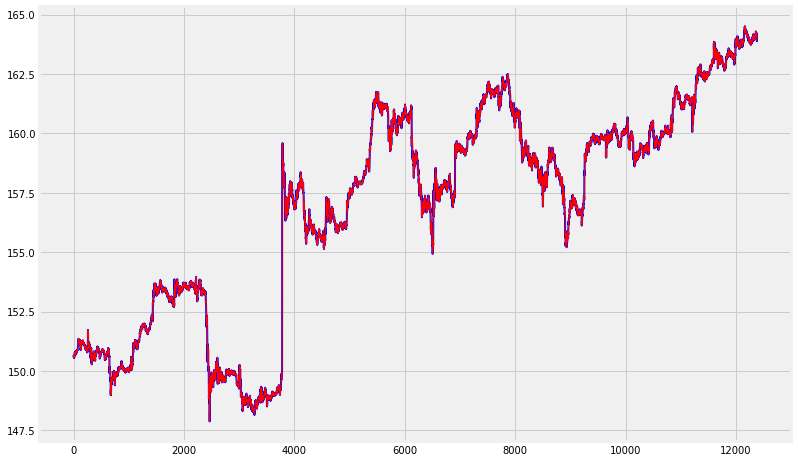

In [24]:
# Print the Mean squared error. 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# Print Root mean squared error.
print('Test RMSE: %.3f' % math.sqrt(error))
plt.figure(figsize=(12,8))
plt.plot(test, color='blue', linewidth=2)
plt.plot(predictions, color='red', linewidth=1)
plt.show()